# データ加工

《学修項目》
* ◎集計処理、四則演算処理
* ◎ソート処理、サンプリング処理
* ◎クレンジング処理（外れ値、異常値、欠損値）
* 結合処理（内部結合、外部結合）
* データ型変換処理
* データの標準化、ダミー変数

《キーワード》
> 量的データ，質的データ, 単純集計, クロス集計, ソート処理とマージ処理, 統合処理とクエリ, 内部結合と外部結合, データクレンジング，データクリーニング, 欠損値処理, 外れ値処理, 異常値処理, ノイズの除去, データの型変換, スケーリング（正規化，標準化）


《参考文献，参考書籍》
*   [1] [東京大学MIセンター公開教材 「2-5 データ加工」](http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf) [《利用条件CC BY-NC-SA》](https://creativecommons.org/licenses/by-nc-sa/4.0/deed.ja)
*   [2] [データサイエンスのためのデータベース（データサイエンス入門シリーズ）（講談社）](https://www.kspub.co.jp/book/detail/5193105.html)
*   [3] [数理・データサイエンス・AI公開講座（放送大学）](https://www.ouj.ac.jp/booklet/2022/29_2022_MDS-AI.pdf)

## 1. データの集計

あらまし
* データベースにおける用語
* データの種類（量的データ，質的データ）
* 単純集計
* クロス集計
* ソート処理とマージ処理


### 1.1 データ加工（data processing）とは

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=4"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_04.jpg' alt='データ加工とは' width='640' border='1'></a>
</figure>

### 1.2 データベースにおける用語

* テーブル（表），カラム（列），レコード（行）RDBではタプル，フィールド値（セル値）　※（カッコ）はExcelでの呼び方

#### Python pandasライブラリで行単位でデータを作ってみる

例）9011から9016までの6名の学生の性別とクラス名，3科目のテストの点数（整数で100点満点）のテーブル

In [219]:
## Python pandasライブラリで列単位でデータを作って，カラム・レコード・フィールド値単位で見てみる
## 参考:https://pystyle.info/pandas-table-styling-cheatsheet/
import numpy as np
import pandas as pd
from IPython.display import display, HTML

# CSVデータなどから read_csv して dataへ読み込んでも良い．
data = [["Male", "A", 84, 70, 96], ["Male", "B", 79, 79, 79], ["Female", "A", 89, 92, 86], 
        ["Male", "A", 99, 76, 98], ["Female", "C", 56, 60, 70], ["Female", "C", 46, 44, 47]]

df = pd.DataFrame(data,
    index=["9011", "9012", "9013", "9014", "9015", "9016"],
    columns=["gender", "class", "Math", "English", "Physics"],
)

# 各行の合計を新たな列 Row_Total として追加する（横軸方向で数値のみ）
df.loc[:,'Row_Total'] = df.sum(numeric_only=True, axis=1)

In [220]:
# English カラム（列） を緑色にする
css_bg_b = {"background-color": "green"}
display(df.style.set_properties(subset="English", **css_bg_b))

,gender,class,Math,English,Physics,Row_Total
9011,Male,A,84,70,96,250
9012,Male,B,79,79,79,237
9013,Female,A,89,92,86,267
9014,Male,A,99,76,98,273
9015,Female,C,56,60,70,186
9016,Female,C,46,44,47,137


In [221]:
# id "9013"番 の レコード（行） をオレンジ色にする
css_bg_o = {"background-color": "orange"}
display(df.style.set_properties(subset=pd.IndexSlice["9013", :], **css_bg_o))

,gender,class,Math,English,Physics,Row_Total
9011,Male,A,84,70,96,250
9012,Male,B,79,79,79,237
9013,Female,A,89,92,86,267
9014,Male,A,99,76,98,273
9015,Female,C,56,60,70,186
9016,Female,C,46,44,47,137


In [222]:
# 数値に応じたカラースケール（ヒートマップ）で表示する
df.style.background_gradient()

,gender,class,Math,English,Physics,Row_Total
9011,Male,A,84,70,96,250
9012,Male,B,79,79,79,237
9013,Female,A,89,92,86,267
9014,Male,A,99,76,98,273
9015,Female,C,56,60,70,186
9016,Female,C,46,44,47,137


#### データの種類

* 量的データ：数字など（四則演算できる） 例）各科目の「点数」（これの合計を求めることができた）
* 質的データ：文字列など（四則演算できない） 例）学生番号，性別，クラス名（識別子として，別々のものとして認識することができる）

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=13"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_13.jpg' alt='整然データ' width='640' border='1'></a>
</figure>

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=14"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_14.jpg' alt='整然データの利点' width='640' border='1'></a>
</figure>

### 1.3 集計処理
* 単純集計
    * データ件数の数え上げ

* 算術演算，統計演算と組み合わせる
    * 四則演算や統計量
    * 条件付き集計

* クロス集計
    * 複数項目の比較

ソート処理とマージ処理
* データの並び替え
* データの統合


### 1.4 集計処理の例（単純集計）

集計（カウント）
* 単純な集計処理
    * データの件数を計算：項目ごとでデータ集計
    * コンピュータでの実装：ExcelやPython(pandas)

⇒ 一つの項目（属性）の性質や，ばらつきを見るのに適している

#### 例題：学生テーブルを作ってみる

* 入力：学生番号，性別，クラス名の一覧表
* 出力：「性別」「クラス」項目別で集計

In [223]:
# 学生番号 : [性別， クラス名] の一覧表を得る（列名マッチで抽出）
df[["gender", "class"]]

,gender,class
9011,Male,A
9012,Male,B
9013,Female,A
9014,Male,A
9015,Female,C
9016,Female,C


In [224]:
# [性別， クラス名] の一覧 から， 性別毎の度数を得る（gender で groupby.count() を使う）
df[["gender", "class"]].groupby('gender').count()

,class
gender,
Female,3
Male,3


In [225]:
# [性別， クラス名] の一覧 から， クラス毎の度数を得る（class で groupby.count() を使う） 
df[["gender", "class"]].groupby('class').count()

,gender
class,
A,3
B,1
C,2


### 1.5 集計処理の例（演算処理）

* 算術演算
    * 四則演算などを組み合わせる

* 度数分布表
    * データを階層別に集計する
    * ヒストグラムを作成し可視化する

* 基本統計量の集計
    * 最大値，最小値，平均値などを求める
    * 箱ひげ図を作成し可視化する

#### 例題：各科目の点数について，度数分布表を作ってみる

* 入力：各科目の点数
* 出力：Math, English, Physicsの度数分布

In [226]:
# 学生番号 : [Math， English, Physics] の一覧表を得る（列名マッチで抽出）
df[["Math", "English", "Physics"]]

,Math,English,Physics
9011,84,70,96
9012,79,79,79
9013,89,92,86
9014,99,76,98
9015,56,60,70
9016,46,44,47


In [227]:
# 科目名 列名マッチで抽出後， [60,100]を４区間に分割した度数分布を value_count で求める
df["Math"].value_counts(bins=np.linspace(60, 100, 5), sort=False)
## df["English"].value_counts(bins=np.linspace(60, 100, 5), sort=False)
## df["Physics"].value_counts(bins=np.linspace(60, 100, 5), sort=False)

(59.999, 70.0]    0
(70.0, 80.0]      1
(80.0, 90.0]      2
(90.0, 100.0]     1
Name: Math, dtype: int64

### 1.6 クロス集計

* 項目を2つ以上かけ合わせて集計する手法
    * 項目（属性）ごとの違いを見る
    * 分割表ともいう
    * 表側（目的変数）と表頭（説明変数）

例）アイスクリームの売上分析の場合，目的変数：アイスクリームの種類，説明変数：その日の気温や天気　などとなる．

* 統計量を組み合わせる
    * 数学の平均をクロス集計する：データの精度が問題になる
    * 各科目の平均をクロス集計する：科目毎の値のばらつきが問題になる

#### 例題：男女別，クラス別 で 各科目の平均点のクロス分析を行ってみる

* 入力：学生番号，性別，クラス名，各科目の平均点の一覧表
* 出力：男女別，クラス別 の 平均点（クロス分析）

In [228]:
# 3科目の点数の平均値を新たな列 Row_Average として追加する
df.loc[:,'Row_Average'] = df[["Math", "English", "Physics"]].sum(axis=1) / 3  # 3科目であることが分かっている

# インタラクティブ・テーブル機能を使って，ソートなど簡単な分析は可能だが，クロス分析は難しい
df

,gender,class,Math,English,Physics,Row_Total,Row_Average
9011,Male,A,84,70,96,250,83.333333
9012,Male,B,79,79,79,237,79.000000
9013,Female,A,89,92,86,267,89.000000
9014,Male,A,99,76,98,273,91.000000
9015,Female,C,56,60,70,186,62.000000
9016,Female,C,46,44,47,137,45.666667


In [229]:
# crosstabを使って， 性別 vs クラス のクロス集計（人数）を行う
pd.crosstab(index=df['gender'],columns=df['class'])

class,A,B,C
gender,,,
Female,1,0,2
Male,2,1,0


In [230]:
# crosstabを使って， 性別 vs クラス の 学生平均点のクロス集計（点数）を行う（欠損値はNaNであることに注意）
pd.crosstab(index=df['gender'],columns=df['class'],values=df['Row_Average'],aggfunc='mean') 

class,A,B,C
gender,,,
Female,89.000000,NaN,53.833333
Male,87.166667,79.0,NaN


In [231]:
# pivot_tableを使って， [性別,クラス]別 の 学生平均点と合計のクロス集計（点数）を行う（欠損値の組み合わせは表示されないことに注意）
# デフォルト（引数aggfuncを省略した場合）はnumpy.mean()が指定される
pd.pivot_table(df[["gender", "class", "Math", "English", "Physics", "Row_Total"]], index=['gender', 'class'])

English  Math  Physics  Row_Total
gender class                                   
Female A           92  89.0     86.0      267.0
       C           52  51.0     58.5      161.5
Male   A           73  91.5     97.0      261.5
       B           79  79.0     79.0      237.0

### 1.7 データの種類

構造化データ
* 分析できる形に構造化されたデータ
* 表形式で整理されたデータセット
→量的データ，質的データに分類される

非構造化データ
* まだ構造化されていないデータ
→ 画像，音声，文章データなど　※データ表現の章を参照

### 1.8 データのソート

* 順序付けの基準（オーダ）
    * 量的変数の場合：科目の得点など（間隔尺度（例：西暦年など），数値尺度（例：重量など）の別がある）
    * 質的変数の場合：名義尺度（学生名など），順序尺度（学籍番号など．順序が存在し，数量によるソートが可能）

昇順と逆順
* 数値の大小で順序付ける：質的変数も，順序尺度であれば可能
* 名義尺度も あいうえお順，ABC順などで順序付け (aab < ac < adbc など文字列にもオーダがつけられる）

### 1.9 ソート処理の例

大きさを指標として並び替える
* 数量データや順序データ
* 文字列のソート：漢字データは，ひらがな　などを付与してオーダをつける（読み方の違いは漢字コード列の情報だけでは不充分）

### 1.10 名寄せ

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=15"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_15.jpg' alt='データ加工とは' width='640' border='1'></a>
</figure>

#### 日本語の氏名には，ふりがなが付いていないと，データ重複，名寄せ処理の妨げになる【重要】

例）　漢字標記で同一でも，同姓同名とは限らない．漢字表記が違っても，よみがなが同一のことがある（紛らわしい)

> 吉川五郎　⇒ きっかわ/ごろう or よしかわ/ごろう <br>
> 小山優子 or 尾山祐子　⇒　おやま/ゆうこ 

名寄せ処理時には，生年月日，現住所，電話番号などで同一か否かの判定をすることになるが，完全とは言えない．

## 2. データの統合処理

あらまし
* 統合処理とクエリ
* データの結合処理
* 内部結合と外部結合

### 2.1 データ統合とは？

統合処理とクエリ
* クエリ＝データベース管理システムに対する問い合わせ，要求
    * SQLで実装する
* プログラムではデータを検索し，変換・整形して出力する．SQLクエリを内部の実装として含むこともある
    * 統合処理の条件指定などを行う必要がある

### 2.2 データの結合処理

* 複数のファイルやデータを（何らかの基準，キーで）結合する処理
* データベースでは，内部結合と外部結合の別がある
* ExcelやPython(pandas)で実装

### 2.3 データベースの結合例

* 複数のデータ集合の結合
    * 学籍簿と成績表の結合など
    * 2つのデータの集合を結ぶ「キー」が必要

* データベースの結合処理
    * 内部結合と外部結合の別，外部キーが必要
    * Union, Join といった処理が提供されている．

* 一般的なデータの結合処理
    * Excelの場合：データツール > 統合
    * Python pandasライブラリの場合：join

### 2.4 内部結合と外部結合

データベース（表）の内部結合
* 結合条件に指定している値が両方のテーブルに存在するデータを抽出する結合
* 2つのテーブル間で，共通（結合条件の項目の値が一致）するレコードのみを抽出

データベース（表）の外部結合
* 基準となるテーブルに存在すれば抽出する結合．どちらのテーブルを基準にするかを指定し，その基準となるテーブルに存在するデータを抽出，基準ではないテーブルからは抽出できるデータのみ取得する．
* 左外部結合（Left Outer Join），右外部結合（Right Outer Join）の別がある
* 完全外部結合は，全ての要素を入れる

参考：https://ai-inter1.com/pandas-dataframe_join/

### 2.5 データベース（表）の内部結合の例

* 両方のテーブルに存在するデータを抽出して結合する
* 2つのテーブル間で，結合条件のフィールド値が一致するレコードのみを出力とする

#### Python pandasライブラリで 2つのテーブルを作ってみる

1. 学生テーブル：9011から9017までの7名の学生の性別とクラスIDの対応表（欠損値あり）
2. クラス名テーブル：クラスIDとクラス名の対応表（当該クラスに学生が存在しないケースあり）

In [232]:
# 学生テーブル：9011から9017までの7名の学生の性別とクラスIDの対応表（"9017"はクラス対応が無い欠損値あり）
std_data = [["9011", "Male", "100"], ["9012", "Male", "200"], ["9013", "Female", "100"], 
            ["9014", "Male", "200"], ["9015", "Female", "100"], ["9016", "Female", "100"], 
            ["9017", "Male", np.nan]]

std_df = pd.DataFrame(std_data,
    columns=["student_id", "gender", "class_id"]
)

std_df

,student_id,gender,class_id
0,9011,Male,100
1,9012,Male,200
2,9013,Female,100
3,9014,Male,200
4,9015,Female,100
5,9016,Female,100
6,9017,Male,NaN


In [233]:
# クラス名テーブル：クラスIDとクラス名の対応表
class_data = [["100", "Science"], ["200", "Humanities"], ["300", "Comprehensive"]]

class_df = pd.DataFrame(class_data,
    columns=["class_id", "class_name"]
)

class_df

,class_id,class_name
0,100,Science
1,200,Humanities
2,300,Comprehensive


In [234]:
# 内部結合（Inner Join）
# merge, innerを用いて， 2つのDataFrameを "class_id" をキーとして内部結合する（表示は学生IDで昇順ソートしindex振り直し．class別でも良い）
pd.merge(std_df, class_df, how="inner", on="class_id").sort_values('student_id').reset_index(drop=True)

# 学生"9017"はクラス割当てが欠損しているので，内部結合結果のレコードとして出力されないことに注意せよ

,student_id,gender,class_id,class_name
0,9011,Male,100,Science
1,9012,Male,200,Humanities
2,9013,Female,100,Science
3,9014,Male,200,Humanities
4,9015,Female,100,Science
5,9016,Female,100,Science


### 2.6 データベース（表）の外部結合の例

* 一方のテーブルについて全レコードを抽出し，もう一方のテーブルについて結合条件のフィールド値と一致するデータのみ抽出
* 全抽出するテーブルの位置により，左外部結合（Left Outer Join），右外部結合（Right Outer Join）が存在する
* 完全外部結合は，全ての要素を入れる

In [235]:
# 左外部結合（Left Outer Join）
# merge, leftを用いて， 2つのDataFrameを "class_id" をキーとして左外部結合する
pd.merge(std_df, class_df, how="left", on="class_id").sort_values('student_id').reset_index(drop=True)

# 学生"9017"はクラス割当てが欠損しているが，学生テーブル（左側）にはデータが存在するので，結合結果のレコードとして出力される（コース割当ては欠損値であるので注意）

,student_id,gender,class_id,class_name
0,9011,Male,100,Science
1,9012,Male,200,Humanities
2,9013,Female,100,Science
3,9014,Male,200,Humanities
4,9015,Female,100,Science
5,9016,Female,100,Science
6,9017,Male,NaN,NaN


In [236]:
# 右外部結合（Right Outer Join）
# merge, rightを用いて， 2つのDataFrameを "class_id" をキーとして右外部結合する
pd.merge(std_df, class_df, how="right", on="class_id").sort_values('student_id').reset_index(drop=True)

# 学生テーブルのレコードとして300番のクラス割当した学生は存在しないが，クラス名テーブル（右側）には300番のレコードが存在するので，結合結果のレコードとして出力される（学生は欠損値であるので注意）

,student_id,gender,class_id,class_name
0,9011,Male,100,Science
1,9012,Male,200,Humanities
2,9013,Female,100,Science
3,9014,Male,200,Humanities
4,9015,Female,100,Science
5,9016,Female,100,Science
6,NaN,NaN,300,Comprehensive


In [237]:
# 完全外部結合（Full Outer Join）
# merge, outerを用いて， 2つのDataFrameを "class_id" をキーとして完全外部部結合する
pd.merge(std_df, class_df, how="outer", on="class_id").sort_values('student_id').reset_index(drop=True)

# "9017"学生のレコードのクラス値，300番クラスの学生値は欠損したままであるので注意

,student_id,gender,class_id,class_name
0,9011,Male,100,Science
1,9012,Male,200,Humanities
2,9013,Female,100,Science
3,9014,Male,200,Humanities
4,9015,Female,100,Science
5,9016,Female,100,Science
6,9017,Male,NaN,NaN
7,NaN,NaN,300,Comprehensive


## 3. データの前処理とデータ変換

### 3.1 データの前処理

データクレンジング，データクリーニング
* 破損したデータ，不正確なデータ，無関係のデータなどの処理
* 住所や名簿などをデータ分析可能な状態にすること

主なデータ前処理
* 欠損値処理
* 外れ値処理，異常値処理
* ノイズの除去

データの変換
* 前処理としてのデータの変換
* 型変換やスケーリング
* 正規化，標準化

### 3.2 欠損値処理

データクレンジング，データクリーニング
* 欠損値の前処理：どんな値で埋めるのか？
    * 一般的には，数値データは平均値で置き換える．質的データは最頻値で置き換える（検討が必要）

ノイズの除去
* センサ値などでノイズが乗った形で出現する
* 正常値と置き換えるなどの処理が考えられる（検討が必要）
    * 例）売上の時系列データの場合，ノイズが生じた場合には過去の同じような時期のデータと比較するなど

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=17"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_17.jpg' alt='データクレンジング' width='640' border='1'></a>
</figure>

### 3.3 欠損値の扱い

欠損値を処理する一般的な方法

* 削除：列や行ごと削除する
* 平均置換：平均値で置き換える（当該レコードの信頼性が毀損する）
* 最頻値で置き換え：質的データに有効
* ダミー置換：ダミー変数（Unknown, Zeroなど）で置き換える

完全データ：全ての値が観測されているデータ
不完全データ：欠損が含まれているデータ

頻繁に欠損値が出現するが，量的データのモデルが既知の場合には，欠損データを予測可能な回帰モデルを作成し，逐次代入する方法がとられる（統計的数値補完）

* [参考：note.nkmk.me | pandasで欠損値NaNを除外（削除）・置換（穴埋め）・抽出](https://note.nkmk.me/python-pandas-nan-dropna-fillna/)

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=19"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_19.jpg' alt='欠損値への対処' width='640' border='1'></a>
</figure>

### 3.4 外れ値処理，異常値処理

* 外れ値：通常とはかけ離れた値
    * 異常の大きい，小さいなど
* 外れ値処理
    * 一般的には「残す」

+異常値：存在し得ない値など（例：非常に小規模な図書館の入場者が100万人であることを示すデータ，など）
    * 欠損値と同じ扱いとする
    * 個別に吟味し，置き換えや削除を検討する

一般的に，データ件数，レコード数が非常に大きくなるど，欠損値・外れ値・異常値を含む可能性が高まる

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=18"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_18.jpg' alt='外れ値の検定' width='640' border='1'></a>
</figure>

### 3.5 前処理：データ変換

データ変換処理の必要性
* 生データは「汚れている」「扱いにくい」
* データの型変換やスケーリングといった前処理が必要

データの型変換
* データ型：プログラミング言語における型変換，整数型，小数点型など
* データサイエンスにおけるデータ変換（スケーリング：正規化，標準化）

プログラミング言語によっては，変数データの型変換コマンドが実装されている

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=16"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_16.jpg' alt='データ型変換' width='640' border='1'></a>
</figure>

### 3.6 データ変換処理

データサイエンスにおけるデータ変換
* 量的データの変換
* 質的データから量的データへの変換（オーダ，ラベリング）

量的データの変換
* スケーリング（尺度）の変更，対数化など
* 正規化，標準化

質的データの変換
* 質的データから量的データへの変換（順序尺度：例 成績が1番，2番, 3番 であった場合，1番の方が3番より成績が良いことは分かるが，1番と3番を「足した」結果は意味をもたない）
* 量的データへの割当て（ラベリング，名義尺度：例 良い=1, 普通=2, 悪い=3）

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=21"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_21.jpg' alt='ダミー変数' width='640' border='1'></a>
</figure>

### 3.7 スケーリング：正規化，標準化

複数のデータを比較するためにデータの形をそろえる
* それぞれの指標に基づいてスケーリングする（尺度を統一する）
* 平均，標準偏差，最大，最小といった統計値を利用する

正規化：最大と最小を利用する
* Min-Max 正規化法
* 最小を0, 最大を1でスケーリング

標準化：平均と標準偏差を利用する
* Z-score 標準化法
* 平均0, 分散1でスケーリング

[参考：scikit-learn.preprocessing, StandardScalerで標準化してみる](https://aiacademy.jp/media/?p=1147)

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=20"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_20.jpg' alt='データの正規化・標準化' width='640' border='1'></a>
</figure>

### 3.8 データの標準化と正規化の例

正規化の例
1. 最大値と最小値の差を求める
2. 最小値からの差を求める
3. 正規化値を求める（1.で割る）

標準化の例
1. 点数を標準化
2. 平均値と標準偏差を求める
3. 平均からの差を標準偏差で割る

[参考：scikit-learn数値系特徴量の前処理まとめ(Feature Scaling)](https://qiita.com/FukuharaYohei/items/7508f2146c63ffe16b1e)


In [238]:
## 上で例にあげた 6名分の3科目の試験点数のデータを標準化，正規化してみる
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler # scikit-learnパッケージから，標準化/正規化ライブラリをインポート

## データを準備して data へ格納する
data = [[84, 70, 96], [79, 79, 79], [89, 92, 86], 
        [99, 76, 98], [56, 60, 70], [46, 44, 47]]

In [239]:
## 正規化ライブラリ MinMaxScaler を使って正規化する
scaler = MinMaxScaler()

scaler.fit(data) # 正規化処理を実行

print(scaler.data_max_) # 各科目の最大値
print(scaler.data_range_) # 各科目の範囲

print(scaler.transform(data)) # 各学生の各科目の点数の，正規化後の位置(最小０, 最大1のスケーリング後)

print(scaler.transform([[75, 75, 75]])) # 点数が全て75点である別の学生がいた場合の，正規化後の位置（同じ75点でも，各科目データの様相によって随分とポジションが異なることに注意せよ）


[99. 92. 98.]
[53. 48. 51.]
[[0.71698113 0.54166667 0.96078431]
 [0.62264151 0.72916667 0.62745098]
 [0.81132075 1.         0.76470588]
 [1.         0.66666667 1.        ]
 [0.18867925 0.33333333 0.45098039]
 [0.         0.         0.        ]]
[[0.54716981 0.64583333 0.54901961]]


In [240]:
## 標準化ライブラリ StandardScaler を使って標準化する
scaler = StandardScaler()

scaler.fit(data) # 標準化処理を実行

print(scaler.mean_) # 各科目の平均値
print(np.sqrt(scaler.var_)) # 各科目の標準偏差値

print(scaler.transform(data)) # 各学生の各科目の点数の，標準化後の位置(平均0, 分散1のスケーリング後)

print(scaler.transform([[75, 75, 75]])) # 点数が全て75点である別の学生がいた場合の，標準化後の位置（同じ75点でも，各科目データの様相によって随分と評価が異なる（±）ことに注意せよ）


[75.5        70.16666667 79.33333333]
[18.57193223 15.14834058 17.33653817]
[[ 0.4576799  -0.01100231  0.96136071]
 [ 0.18845643  0.58312218 -0.01922721]
 [ 0.72690336  1.44130198  0.38454428]
 [ 1.2653503   0.38508068  1.076724  ]
 [-1.04997152 -0.67114062 -0.538362  ]
 [-1.58841846 -1.72736192 -1.86503978]]
[[-0.02692235  0.31906685 -0.24995379]]


## 4. Python pandasによるデータクレンジングと分析の例

### （重要：欠損値，外れ値ありに加工した）気象データを用いた処理例 (Python pandas)

### 4.1 欠損値のあるレコードの検出，欠損値の線形補間法による穴埋め（使用する際は要注意）

In [241]:
# オリジナルのCSVデータを カレントディレクトリ直下のフォルダ（一時作業領域）へダウンロードする．
!wget -nc https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/resources/JMA_Nagano_2021_original.csv

# 欠損値，外れ値あり加工済CSVファイルもダウンロードする
!wget -nc https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/resources/JMA_Nagano_2021_error.csv

# wgetしなくても，Google colab.の左メニュー [ファイル] アイコンをクリックして，ブラウザへファイルをドラッグ＆ドロップしても可

# ファイル (JMA_Nagano_2021_xxxxxxx.csv)がダウンロード・配置できたことを確認する
##!ls -al ./

# オリジナルと加工済ファイルの相違点を diff で確認しておく
!diff JMA_Nagano_2021_original.csv JMA_Nagano_2021_error.csv


File ‘JMA_Nagano_2021_original.csv’ already there; not retrieving.

--2022-09-23 07:30:11--  https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/resources/JMA_Nagano_2021_error.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39042 (38K) [text/plain]
Saving to: ‘JMA_Nagano_2021_error.csv’

JMA_Nagano_2021_err 100%[===================>]  38.13K  --.-KB/s    in 0.004s  

2022-09-23 07:30:11 (9.24 MB/s) - ‘JMA_Nagano_2021_error.csv’ saved [39042/39042]

46c46
< 2021/2/14,8,17.4,-1.1,0,9.4,2.1,6.5,西南西,10.3,南西,西南西,6.5,29,64,晴後一時曇,曇時々晴後一時雨
---
> 2021/2/14,NaN,NaN,NaN,0,9.4,2.1,6.5,西南西,10.3,南西,西南西,6.5,29,64,晴後一時曇,曇時々晴後一時雨
75c75
< 2021/3/15,5.9,12.2,0.5,0,8.3,2.5,7.8,東,11.5,東,東北東,5.8,44,64,晴一時曇,晴後時々曇
---
> 2021/3/15,5.9,12.2,0.5,NaN,8.3,2.5,7.8,東,11

In [242]:
# 欠損値，外れ値あり加工済CSVファイルをpandasで読み込んでデータフレームdfに格納
import pandas as pd
from IPython.display import display

df = pd.read_csv('JMA_Nagano_2021_error.csv')
df.columns = ['date','temp_ave','temp_high','temp_low','rain_total','sun_shine','wind_ave','wind_max','wind_dir','wind_peak','wind_dir2','wind_dir16','humid_ave','humid_max','humid_ave2','forecast_day','forecast_night']

# インタラクティブ表示にして，　[Filter] > [Search by all fields:] に NaN で検索すると，欠損値を含むレコードの場所が分かる（日付とカラム名をメモしておくこと）
# しかし，外れ値（異常値）がどこに潜んでいるかは，わかりませんね！
display(df)

,date,temp_ave,temp_high,temp_low,rain_total,sun_shine,wind_ave,wind_max,wind_dir,wind_peak,wind_dir2,wind_dir16,humid_ave,humid_max,humid_ave2,forecast_day,forecast_night
0,2021/1/1,-1.9,0.9,-3.5,5.5,1.4,1.2,4.9,北東,6.9,北東,東北東,4.9,77,92,雪時々曇一時晴,晴時々曇
1,2021/1/2,-2.3,1.3,-4.5,0.0,0.1,1.7,6.8,北,10.6,北,東北東,4.6,73,89,曇時々雪一時晴,晴時々曇一時雪
2,2021/1/3,-2.5,0.7,-5.5,0.0,1.6,1.3,3.6,東,4.9,東北東,東,4.6,79,89,曇時々雪一時晴,晴時々曇一時雪
3,2021/1/4,-1.4,3.5,-5.3,0.0,4.4,1.1,3.2,東北東,4.3,東北東,東,4.9,72,89,曇一時雪後晴,晴後時々曇
4,2021/1/5,-0.6,2.7,-3.0,0.0,1.5,1.0,2.7,西南西,4.0,西南西,東,5.3,76,90,曇後一時晴,曇時々晴
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021/12/27,-3.3,-0.3,-6.2,0.0,1.6,1.1,3.8,東,5.5,東北東,東北東,4.1,61,85,曇時々雪,雪時々曇
361,2021/12/28,-2.0,1.7,-5.3,2.0,5.9,2.3,6.0,東北東,8.2,東北東,東北東,4.4,64,84,晴時々曇一時雪,晴後一時曇
362,2021/12/29,-1.3,5.8,-8.0,0.0,8.2,1.3,3.5,南南西,6.0,南南西,南南西,4.2,47,76,晴一時曇,晴後曇一時雪
363,2021/12/30,0.0,2.0,-1.9,7.0,0.2,1.4,4.0,東,6.6,東,東,5.9,86,96,みぞれ時々曇一時雪、雷を伴う,曇時々雪一時みぞれ


In [243]:
# 行・列ごとに欠損値の個数をカウント
print(df.isnull().sum())

date              0
temp_ave          1
temp_high         1
temp_low          1
rain_total        1
sun_shine         1
wind_ave          0
wind_max          0
wind_dir          0
wind_peak         0
wind_dir2         0
wind_dir16        0
humid_ave         0
humid_max         0
humid_ave2        0
forecast_day      0
forecast_night    0
dtype: int64


In [244]:
# 欠損値NaNが一つでも含まれる行を抽出
print(df[df.isnull().any(axis=1)])

           date  temp_ave  temp_high  temp_low  rain_total  sun_shine  \
44    2021/2/14       NaN        NaN       NaN         0.0        9.4   
73    2021/3/15       5.9       12.2       0.5         NaN        8.3   
357  2021/12/24       2.7        8.6      -2.7         0.0        NaN   

     wind_ave  wind_max wind_dir  wind_peak wind_dir2 wind_dir16  humid_ave  \
44        2.1       6.5      西南西       10.3        南西        西南西        6.5   
73        2.5       7.8        東       11.5         東        東北東        5.8   
357       1.3       2.8       南西        4.2       東北東          東        5.6   

     humid_max  humid_ave2 forecast_day forecast_night  
44          29          64        晴後一時曇       曇時々晴後一時雨  
73          44          64         晴一時曇          晴後時々曇  
357         49          77         晴時々曇            曇後雨  


In [245]:
# 欠損値NaNを前後の値から補間するinterpolateを用いる例（欠損値1つのみ．線形補間法による．case-by-caseであるので注意せよ）
df_inter = df.interpolate(method='linear', limit=1, limit_direction='both')

# さきほどメモした欠損値を含むレコードの場所で，補完されたデータの値を確かめよ．補完値は妥当か？ 線形補間で良いのか？ 周期トレンドは考慮しなくていいのか？
df_inter

,date,temp_ave,temp_high,temp_low,rain_total,sun_shine,wind_ave,wind_max,wind_dir,wind_peak,wind_dir2,wind_dir16,humid_ave,humid_max,humid_ave2,forecast_day,forecast_night
0,2021/1/1,-1.9,0.9,-3.5,5.5,1.4,1.2,4.9,北東,6.9,北東,東北東,4.9,77,92,雪時々曇一時晴,晴時々曇
1,2021/1/2,-2.3,1.3,-4.5,0.0,0.1,1.7,6.8,北,10.6,北,東北東,4.6,73,89,曇時々雪一時晴,晴時々曇一時雪
2,2021/1/3,-2.5,0.7,-5.5,0.0,1.6,1.3,3.6,東,4.9,東北東,東,4.6,79,89,曇時々雪一時晴,晴時々曇一時雪
3,2021/1/4,-1.4,3.5,-5.3,0.0,4.4,1.1,3.2,東北東,4.3,東北東,東,4.9,72,89,曇一時雪後晴,晴後時々曇
4,2021/1/5,-0.6,2.7,-3.0,0.0,1.5,1.0,2.7,西南西,4.0,西南西,東,5.3,76,90,曇後一時晴,曇時々晴
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021/12/27,-3.3,-0.3,-6.2,0.0,1.6,1.1,3.8,東,5.5,東北東,東北東,4.1,61,85,曇時々雪,雪時々曇
361,2021/12/28,-2.0,1.7,-5.3,2.0,5.9,2.3,6.0,東北東,8.2,東北東,東北東,4.4,64,84,晴時々曇一時雪,晴後一時曇
362,2021/12/29,-1.3,5.8,-8.0,0.0,8.2,1.3,3.5,南南西,6.0,南南西,南南西,4.2,47,76,晴一時曇,晴後曇一時雪
363,2021/12/30,0.0,2.0,-1.9,7.0,0.2,1.4,4.0,東,6.6,東,東,5.9,86,96,みぞれ時々曇一時雪、雷を伴う,曇時々雪一時みぞれ


### 4.2 「統計ベース」による外れ値検知を試す

> 機械学習を取り入れたAIシステムの構築は，<br>
> ①データセット作成（前処理）→ ②モデルの構築 → ③モデルの適用<br>
> というプロセスで行っていき，その際「データセット作成（前処理）」の段階では、正しくモデル構築できるよう、事前にデータを整備しておくことが求められます。
> その際に問題なることが多い「外れ値」とその対処方法について解説していきます。

[参考:Qiita 外れ値検出](https://qiita.com/tk-tatsuro/items/a49ccab4441dc1dfc86c)


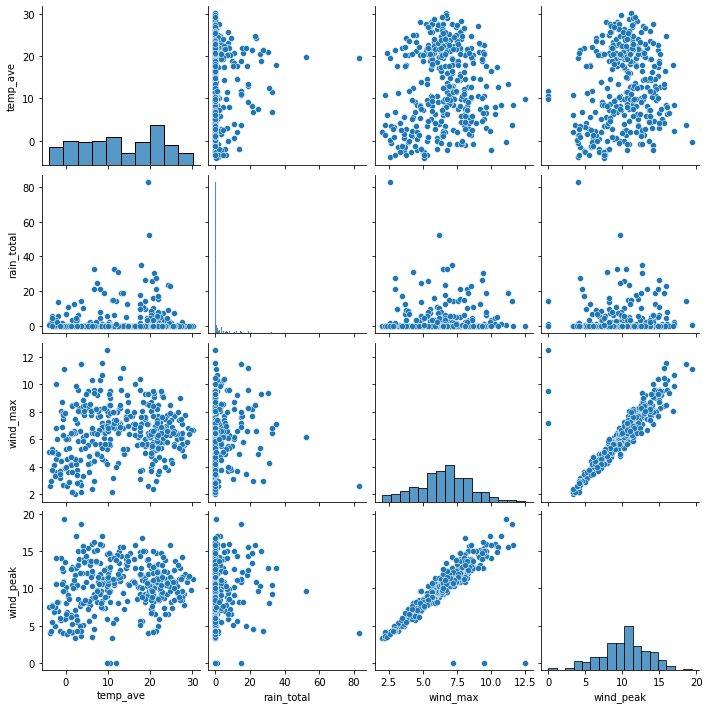

In [259]:
# Python, pandas, seabornでペアプロット図（散布図行列）を作成してみる
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.pairplot(df_inter.loc[:, ['temp_ave','rain_total','wind_max','wind_peak']])


#### wind_max vs wind_peakで， wind_peakがゼロに貼り付いている点が3箇所見つかったので，このペアで更に詳細に見てみる

[参考: Seaborn で散布図・回帰モデルを可視化する](
https://pythondatascience.plavox.info/seaborn/%E6%95%A3%E5%B8%83%E5%9B%B3%E3%83%BB%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


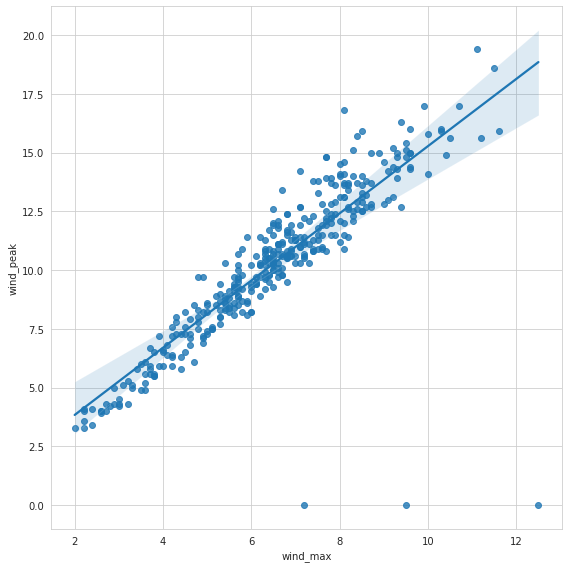

In [273]:
## seaborn regplotで線形回帰直線と信頼区間を描画してみる．
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

x = df_inter["wind_max"] # 「最大風速」は10分間の平均風速の最大値
y = df_inter["wind_peak"] # 「最大瞬間風速」は瞬間風速の最大値

sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))

sns.regplot(x, y, order=1, ci=100) # seabornを使っての線形回帰＆信頼区間の描画を行う

plt.xlabel("wind_max"); plt.ylabel("wind_peak")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1152x1152 with 0 Axes>

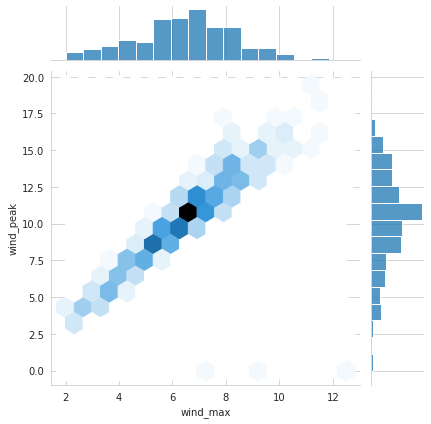

In [278]:
## joinlot, hexで見てみると，度数が大きく線形性のあるクラスターが見えてきて，かつ wind_peakのヒストグラムとしてゼロ付近で飛び地になっている箇所があることがわかる
plt.figure(figsize=(16, 16))

sns.jointplot(x, y, kind="hex") .set_axis_labels("wind_max", "wind_peak")
plt.show()

In [279]:
## 確証を得るために，wind_max と wind_peakの記述統計量を比較する（両方とも風速なので自然ならば同じ傾向を示すはず）
df_inter[['wind_max','wind_peak']].describe()

,wind_max,wind_peak
count,365.000000,365.000000
mean,6.484384,10.248767
std,1.907404,3.196122
min,2.000000,0.000000
25%,5.300000,8.300000
50%,6.500000,10.500000
75%,7.800000,12.400000
max,12.500000,19.400000


ここまでで明らかになったことは，

* 'temp_ave','rain_total','wind_max','wind_peak' の4つの説明変数の組み合わせのうち，'wind_max','wind_peak'は線形性の関係にある（両方とも風速であるので）
* seaborn.regplot の図から読み取ると， wind_peak = wind_max * 1.56 ぐらいと見える（原点を通ると仮定している）
* 'wind_max','wind_peak' の線形回帰直線からのばらつきは，ガウス分布であると仮定してよい．
* wind_peakの記述統計量として， 最小値がゼロというのは異常と思われる（wind_maxの最小値が2.0にも関わらず，瞬間最大風速がゼロとは，どういうことなのか？？）

#### 分位数を指定した，外れ値の除去を行う（df.quantile）

今回は365日中で，3点異常に小さい値が見つかるということから，分位数0.8％の値を取得して，外れ値を除去していく．

In [289]:
# 分位数を指定する—df.quantile()
q = df_inter['wind_peak'].quantile(0.008)

df_inter_quan = df_inter.query('wind_peak < @q') # queryを使って，外れ値となっているレコードを確認する
df_inter_quan
## 確かに， wind_peak が 0.0 であって異常な値が入っているレコード（2021/5/1, 2, 3の3日間）が検出できた．

,date,temp_ave,temp_high,temp_low,rain_total,sun_shine,wind_ave,wind_max,wind_dir,wind_peak,wind_dir2,wind_dir16,humid_ave,humid_max,humid_ave2,forecast_day,forecast_night
120,2021/5/1,11.8,22.5,4.9,14.5,3.6,2.4,7.2,南南西,0.0,南南西,南西,10.4,34,78,曇時々雨一時晴、雷を伴う,雨時々曇一時晴
121,2021/5/2,10.6,17.3,5.0,1.0,6.0,3.7,9.5,北,0.0,北,西,9.1,39,73,晴後曇時々雨,曇一時雨後晴
122,2021/5/3,9.8,17.7,3.2,0.0,7.8,2.1,12.5,西,0.0,西北西,西,7.2,22,63,晴時々雨一時曇,晴時々曇


In [ ]:
# 外れ値となっているレコード3つを取り除いたデータセット（欠損値，異常値は無いので，各種分析に使える状態となった）
df_cleansed = df_inter.query('wind_peak >= @q') # queryを使って，外れ値となっているレコード3つを取り除いたデータ
#df_cleansed

wind_peak が 0.0 であって異常な値が入っているレコード（2021/5/1, 2, 3の3日間）については，先にもとめた線形回帰式（wind_peak = wind_max * 1.56) を使って，数値補完する方法が考えられる．

### 4.3 scikit-learn を用いた線形回帰の実行例: 単回帰分析

In [294]:
# sklearn.linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression() # 線形回帰モデラー（教師無し学習）を作る

X = df_cleansed.loc[:, ['wind_max']] # 説明変数に "wind_max (最大風速)" を利用
Y = df_cleansed.loc[:, ['wind_peak']] # 目的変数に "wind_peak" を利用
clf.fit(X, Y) # 線形予測モデルを作成

print(clf.coef_) # 回帰係数の表示
print(clf.intercept_) # 切片 (誤差) の表示
print(clf.score(X, Y)) # 決定係数の表示

[[1.55999767]]
[0.26008135]
0.9147560180956491


これにより， [window_peak]予測値 = 1.55999767 x [window_max] + 0.26008135 であると回帰式が求められた． 原点を通らず +0.26だけオフセットがあるのは，風速計の機材や性質の関係と考えられる．

### （参考） 教師なし学習(決定木)を用いた外れ値の自動検知 IsolationForest

[参考:CUBE SUGAR CONTAINER | 教師なし学習で外れ値の検知に使える IsolationForest というアルゴリズムを試してみる](https://blog.amedama.jp/entry/2019/04/20/124220)

> このアルゴリズムの興味深いところは、教師データの中にある程度外れ値が含まれていても構わないという点。 つまり、アノテーションしていないデータをそのまま突っ込むことが許容されている。<br>
> IsolationForest のアルゴリズムでは、決定木を使った分類しやすさにもとづいてデータが正常か外れ値かを判断する。 外れ値は正常なデータに比べると数が少なく、特徴が大きく異なると仮定する。 だとすると、外れ値は正常なデータに比べて分類するのに木の深さがより多く必要と考える。


## (オプション) Excel Power Query によるデータ加工・分析[1]

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=5"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_05.jpg' alt='Excel Power Query' width='640' border='1'></a>
</figure>

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=6"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_06.jpg' alt='Excel Power Query' width='640' border='1'></a>
</figure>

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=7"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_07.jpg' alt='Excel Power Query' width='640' border='1'></a>
</figure>

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=8"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_08.jpg' alt='Excel Power Query' width='640' border='1'></a>
</figure>

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=9"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_09.jpg' alt='Excel Power Query' width='640' border='1'></a>
</figure>

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=10"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_10.jpg' alt='Excel Power Query' width='640' border='1'></a>
</figure>

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=11"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_11.jpg' alt='Excel Power Query' width='640' border='1'></a>
</figure>

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=12"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_12.jpg' alt='Excel Power Query' width='640' border='1'></a>
</figure>

## (参考) ビッグデータ処理ツール

<figure>
<a href="http://www.mi.u-tokyo.ac.jp/pdf/2-5_data_processing.pdf#page=22"><img src='https://raw.githubusercontent.com/MDASH-shinshu/MDASH-T-DE/main/5/UTAI-text/JPEG/2-5_data_processing_22.jpg' alt='データ加工とは' width='640' border='1'></a>
</figure>

* [Apache Spark](https://spark.apache.org/)
* [Apache Hadoop](https://hadoop.apache.org/)
* [HillView](https://github.com/vmware/hillview)


# memo